# Importing Necessary Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading The Data

In [115]:
df= pd.read_csv('Thyroid disease prediction.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# EDA

In [74]:
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [75]:
#first 5 rows
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [76]:
df.shape

(383, 17)

In [77]:
#statistical information about the data
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [78]:
#number of nulls in each column
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Smoking History         0
Radiotherapy History    0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
Tumor                   0
Lymph Nodes             0
Cancer Metastasis       0
Stage                   0
Treatment Response      0
Recurred                0
dtype: int64

In [79]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Smoking History       383 non-null    object
 4   Radiotherapy History  383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  Tumor                 383 non-null    object
 12  Lymph Nodes           383 non-null    object
 13  Cancer Metastasis     383 non-null    object
 14  Stage                 383 non-null    object
 15  Treatment Response    383 non-null    ob

In [80]:
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Smoking History         object
Radiotherapy History    object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
Tumor                   object
Lymph Nodes             object
Cancer Metastasis       object
Stage                   object
Treatment Response      object
Recurred                object
dtype: object

<Axes: xlabel='Age'>

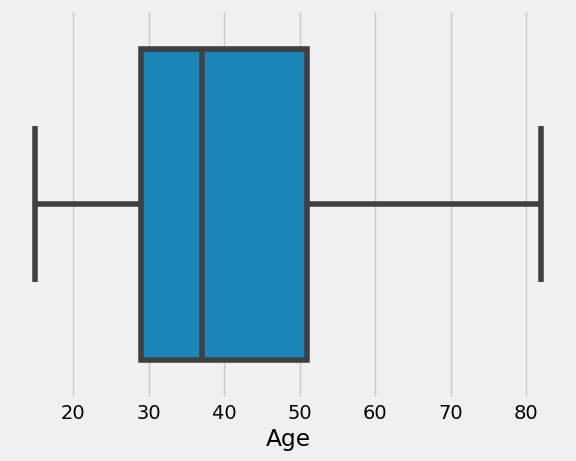

In [81]:
sns.boxplot(x=df['Age'])

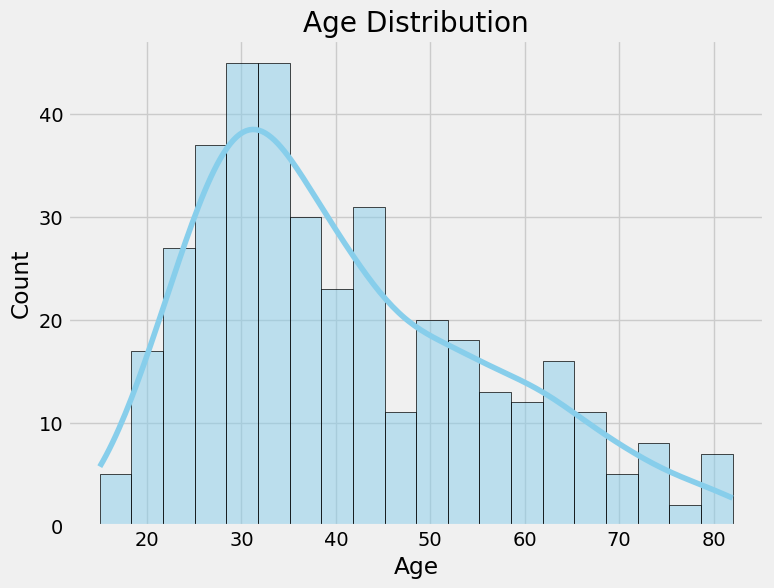

In [82]:
#Age distribution
plt.figure(figsize = (8, 6))
sns.histplot(df['Age'], bins = 20, kde = True, color = 'skyblue', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

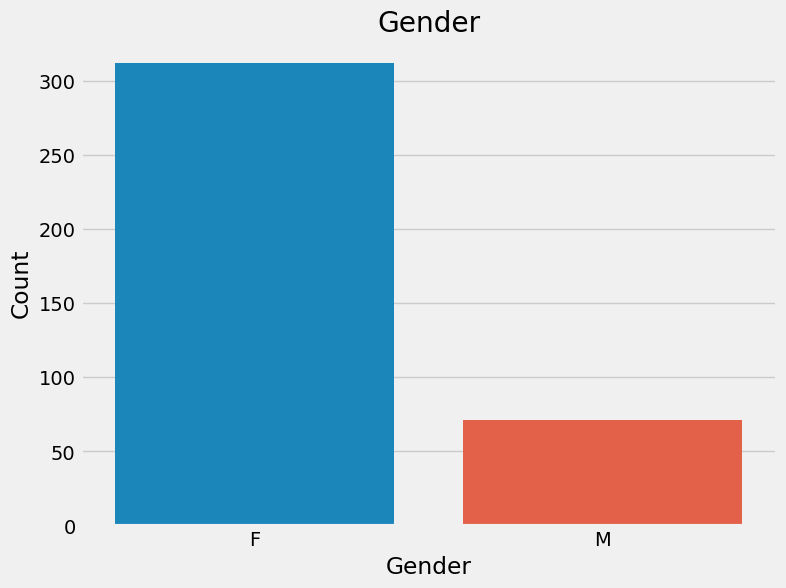

In [83]:
#Gender
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Gender', data = df)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

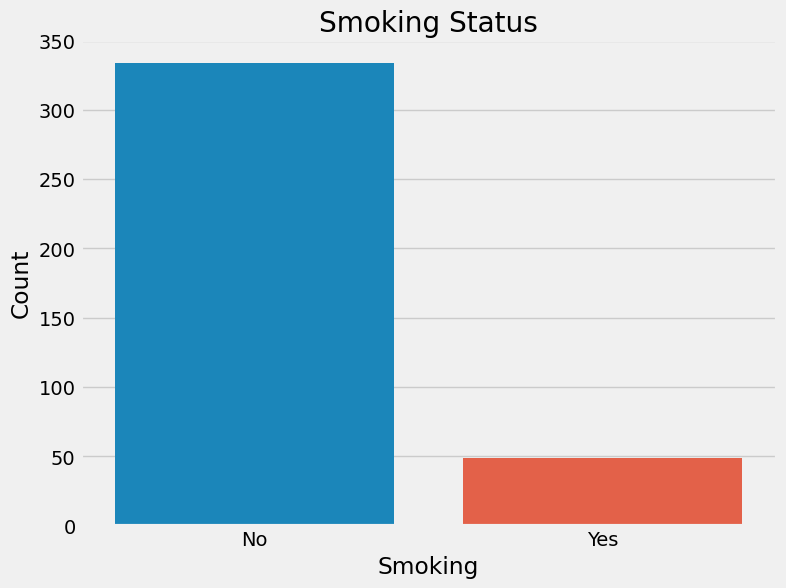

In [86]:
#Smoking status
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Smoking', data = df)
plt.title('Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

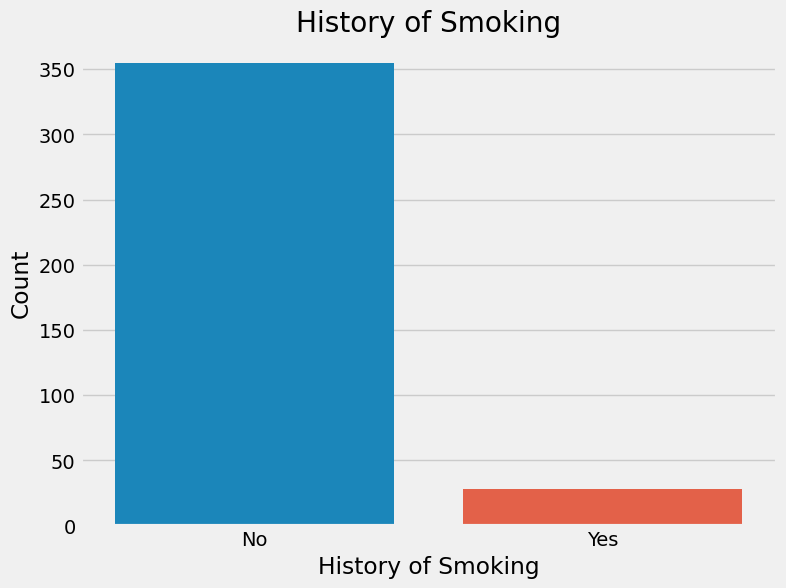

In [87]:
#History of Smoking
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Smoking History', data = df)
plt.title('History of Smoking')
plt.xlabel('History of Smoking')
plt.ylabel('Count')
plt.show()

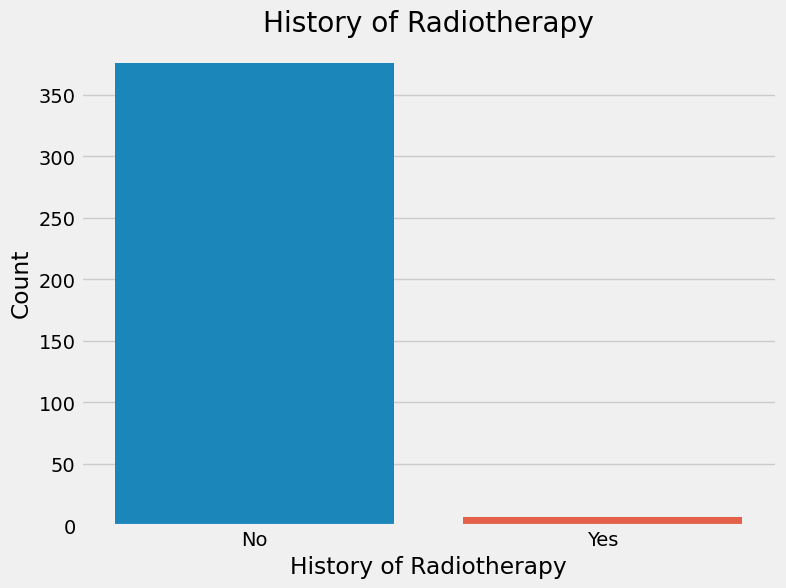

In [89]:
#History of Radiotherapy
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Radiotherapy History', data = df)
plt.title('History of Radiotherapy')
plt.xlabel('History of Radiotherapy')
plt.ylabel('Count')
plt.show()

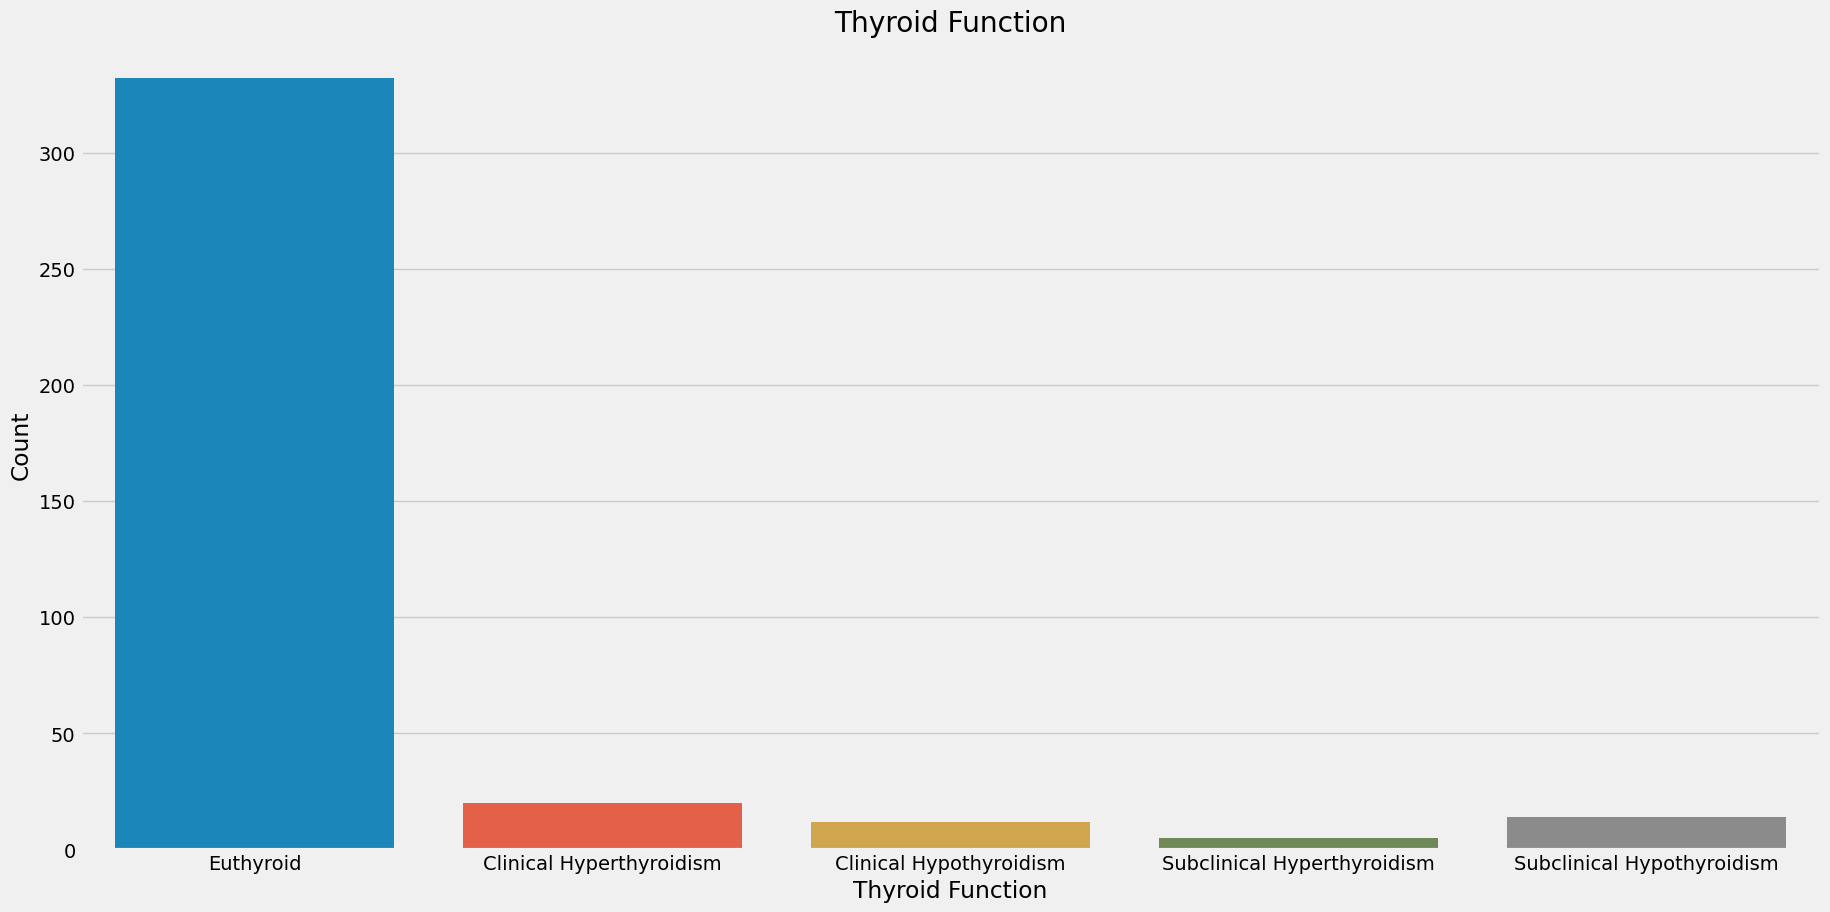

In [90]:
#Thyroid Function
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Thyroid Function', data = df)
plt.title('Thyroid Function')
plt.xlabel('Thyroid Function')
plt.ylabel('Count')
plt.show()

In [118]:
df['Physical Examination'].value_counts()

Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

<Axes: ylabel='count'>

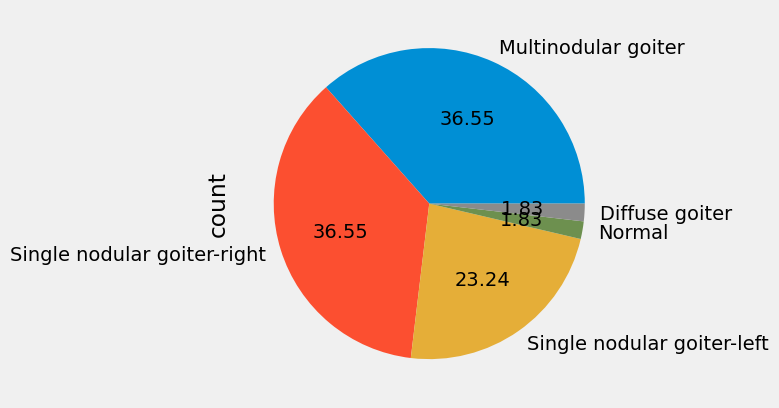

In [117]:
df["Physical Examination"].value_counts().plot(kind='pie',autopct='%.2f') # autopct is used percentange on graph

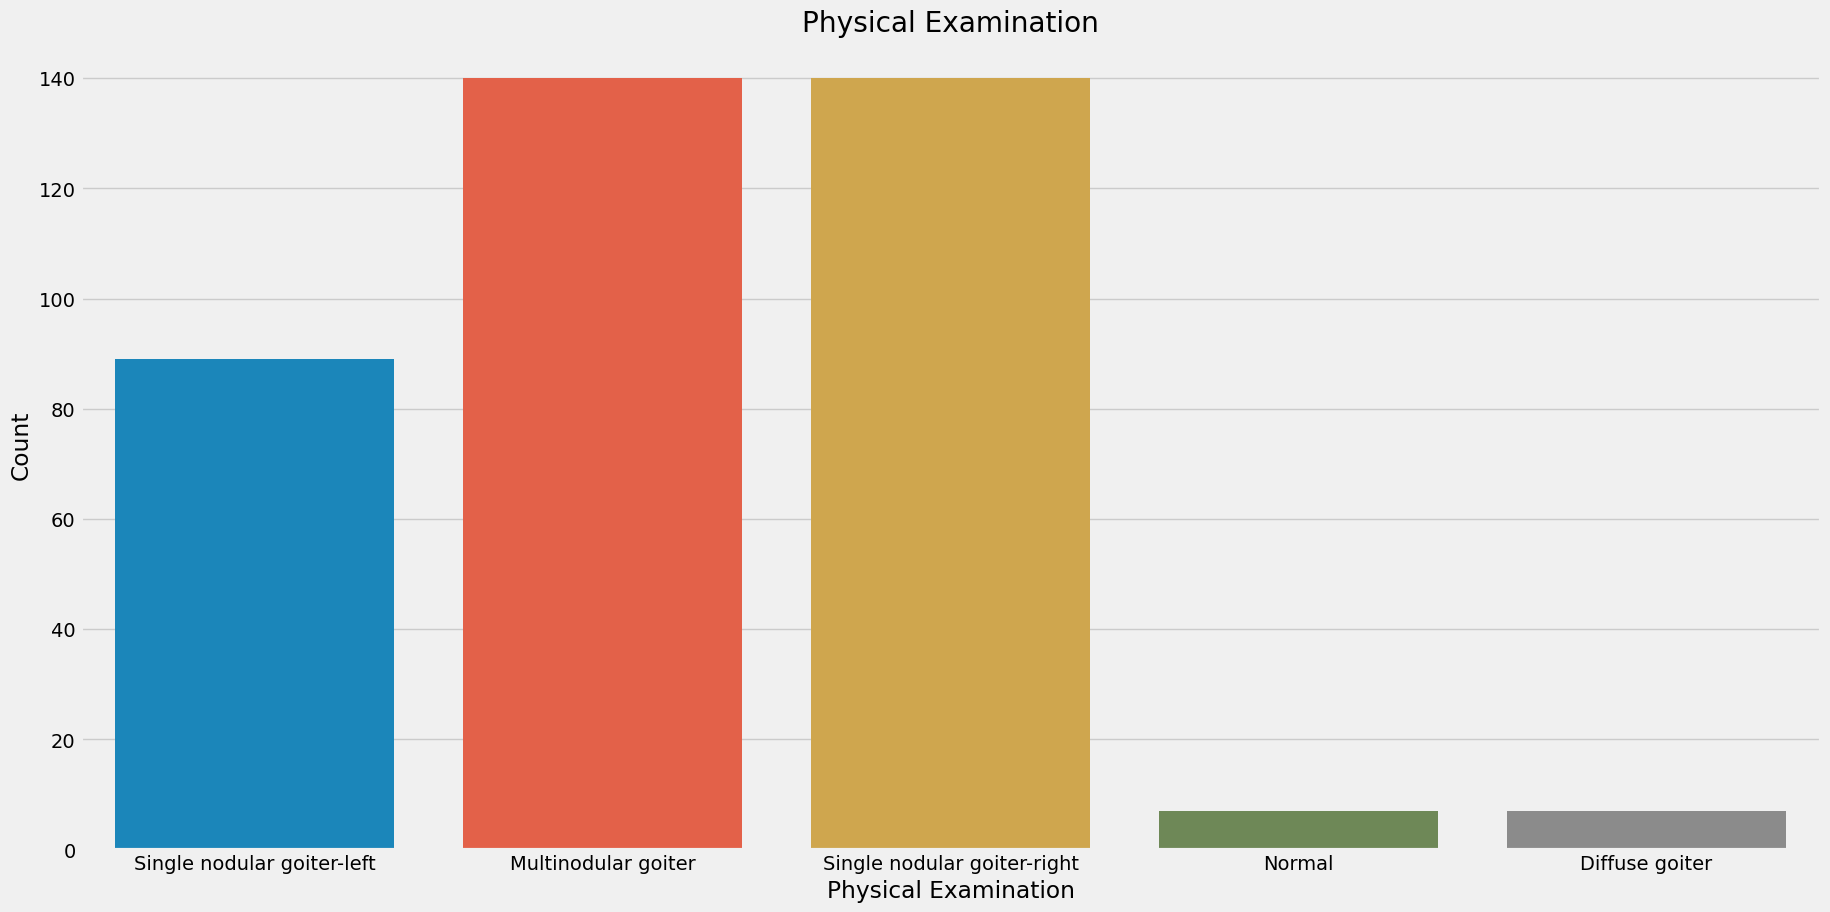

In [91]:
#Physical Examination
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Physical Examination', data = df)
plt.title('Physical Examination')
plt.xlabel('Physical Examination')
plt.ylabel('Count')
plt.show()

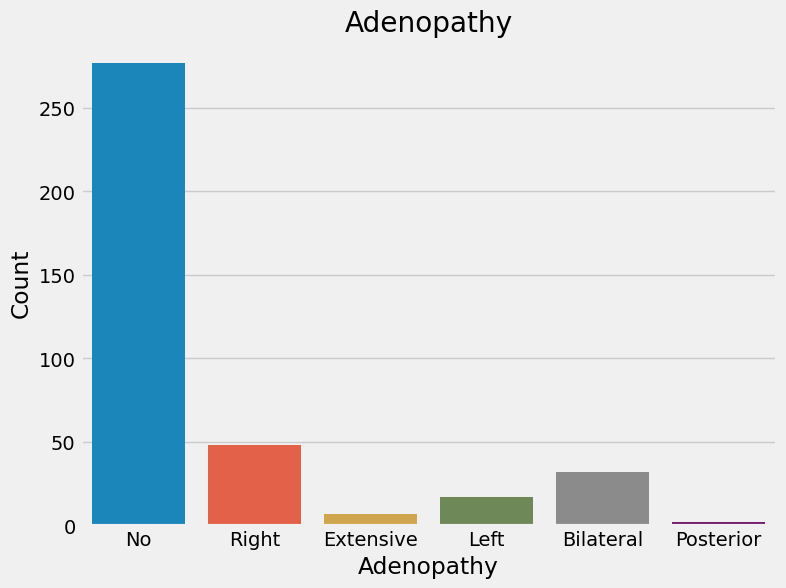

In [92]:
#Adenopathy
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Adenopathy', data = df)
plt.title('Adenopathy')
plt.xlabel('Adenopathy')
plt.ylabel('Count')
plt.show()

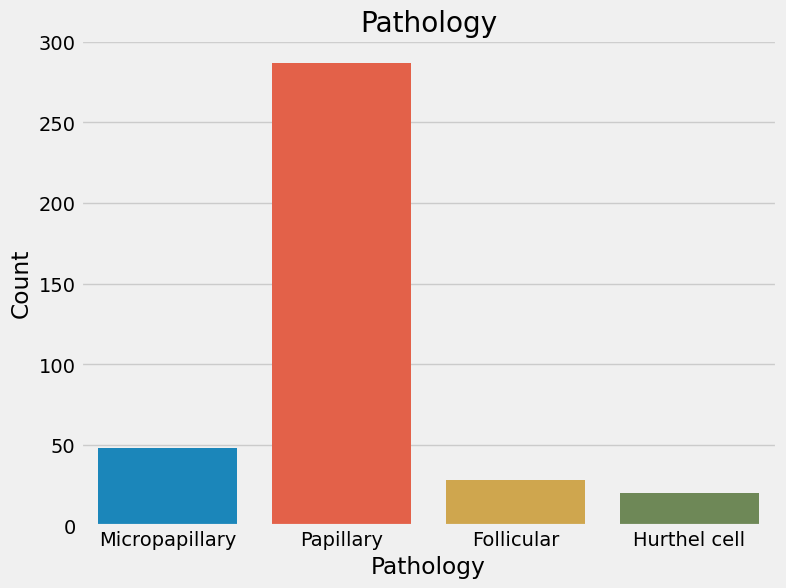

In [93]:
#Pathology
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Pathology', data = df)
plt.title('Pathology')
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.show()

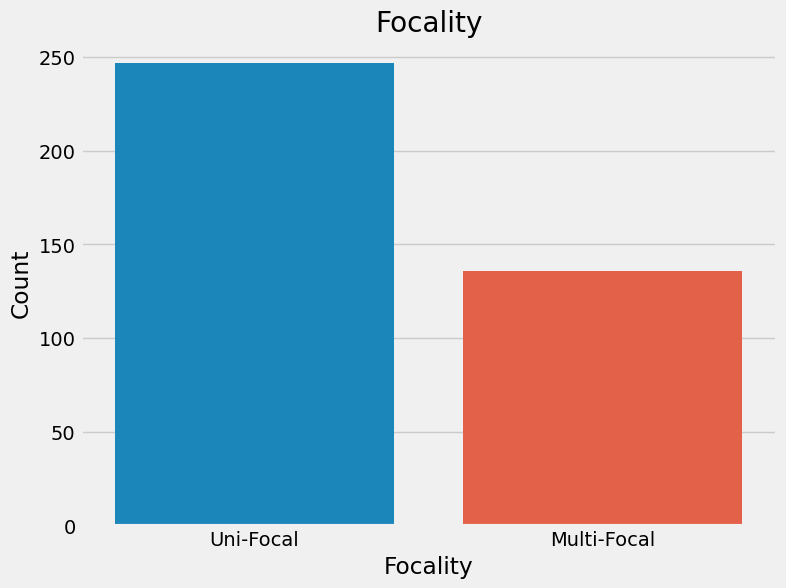

In [94]:
#Focality
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Focality', data = df)
plt.title('Focality')
plt.xlabel('Focality')
plt.ylabel('Count')
plt.show()

In [95]:
df['Risk'].value_counts()

Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64

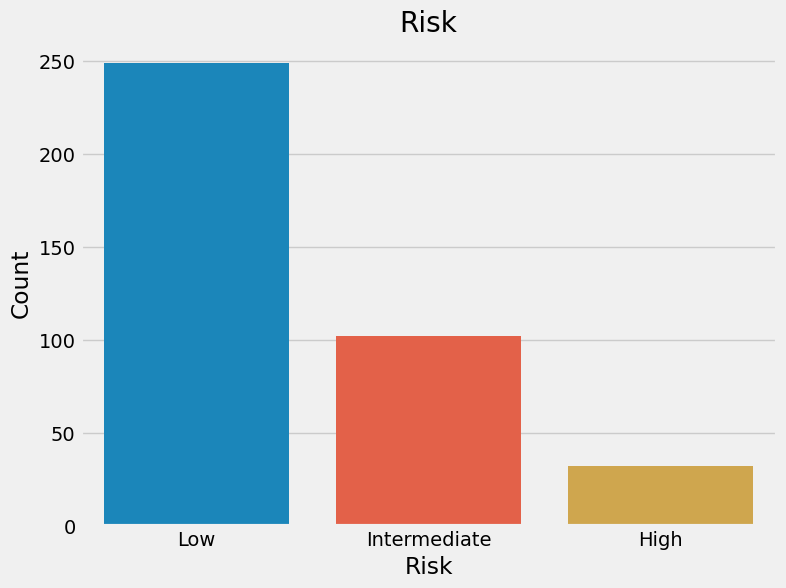

In [96]:
#Risk
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Risk', data = df)
plt.title('Risk')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.show()

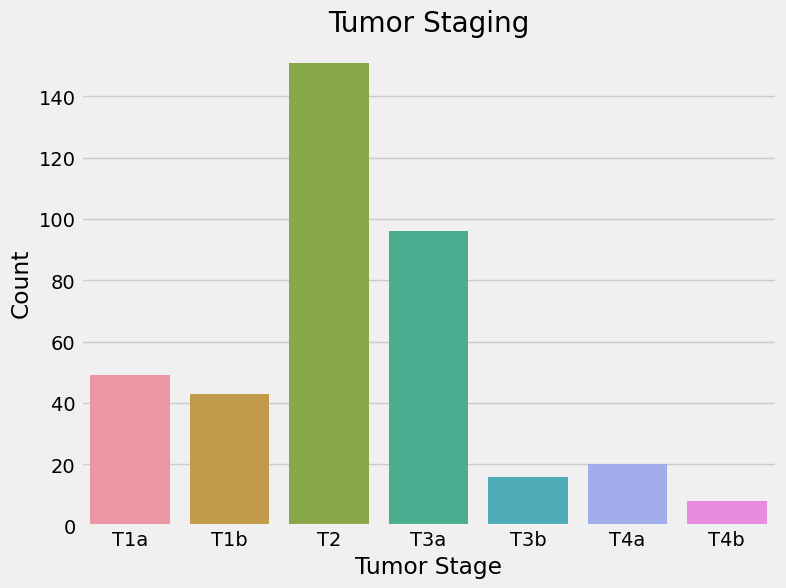

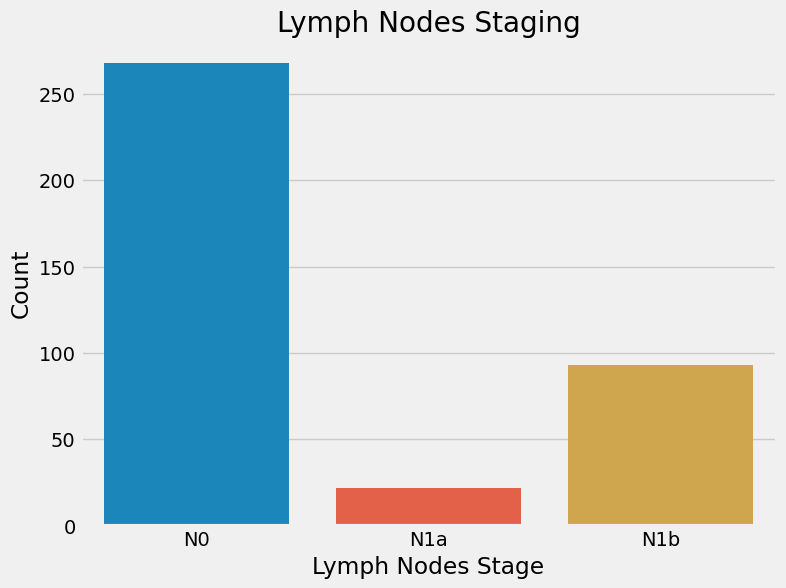

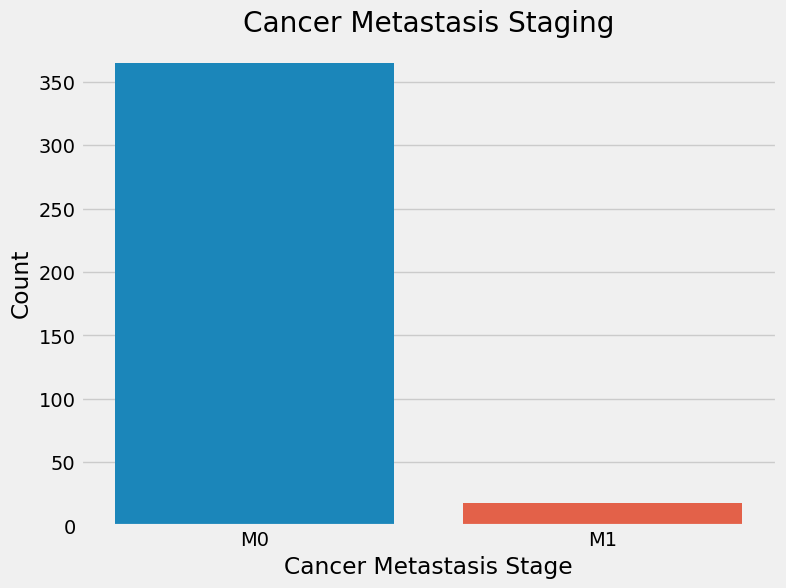

In [100]:
#T, N, M (TNM Staging)
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Tumor', data = df, order = sorted(df['Tumor'].unique()))
plt.title('Tumor Staging')
plt.xlabel('Tumor Stage')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (8, 6))
sns.countplot(x = 'Lymph Nodes', data = df, order = sorted(df['Lymph Nodes'].unique()))
plt.title('Lymph Nodes Staging')
plt.xlabel('Lymph Nodes Stage')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (8, 6))
sns.countplot(x = 'Cancer Metastasis', data = df, order = sorted(df['Cancer Metastasis'].unique()))
plt.title('Cancer Metastasis Staging')
plt.xlabel('Cancer Metastasis Stage')
plt.ylabel('Count')
plt.show()

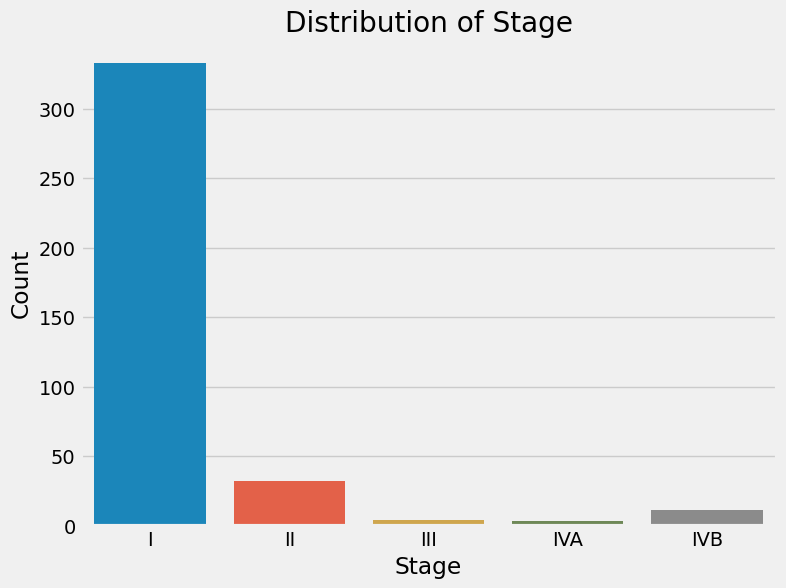

In [101]:
#Stage
stage_order = ['I', 'II', 'III', 'IVA', 'IVB']

plt.figure(figsize = (8, 6))
sns.countplot(x = 'Stage', data = df, order = stage_order)  # Order the stages
plt.title('Distribution of Stage')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

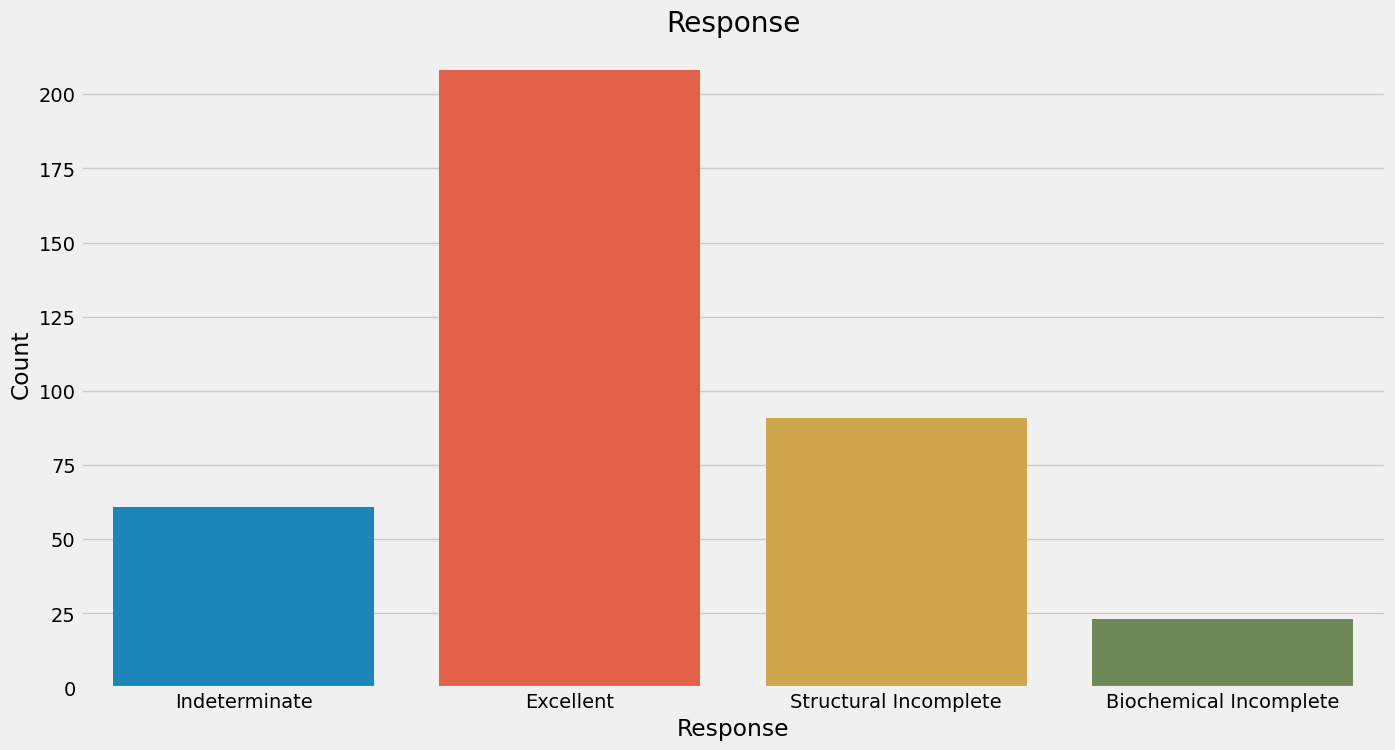

In [103]:
#Response
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Treatment Response', data = df)
plt.title('Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [104]:
df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

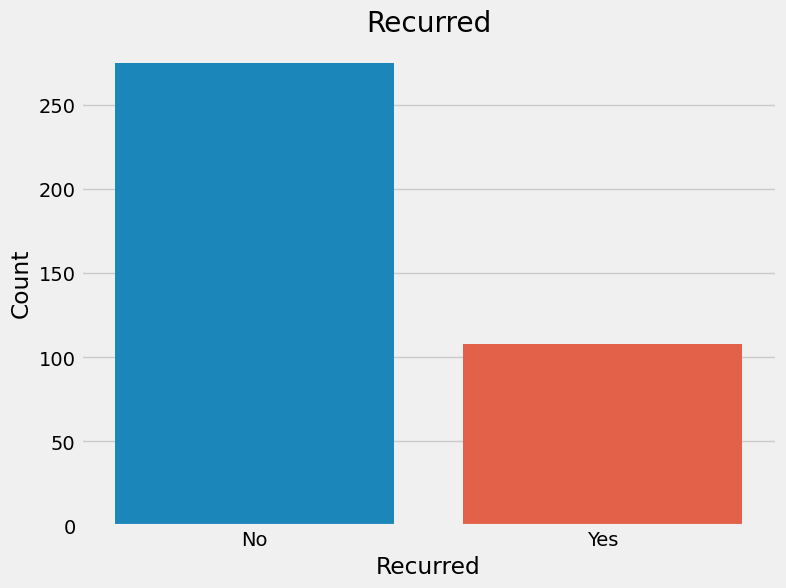

In [105]:
#Recurred
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Recurred', data = df)
plt.title('Recurred')
plt.xlabel('Recurred')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Risk', ylabel='Age'>

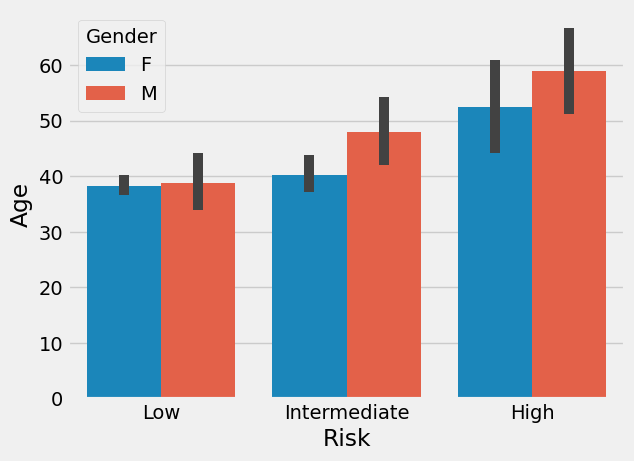

In [119]:
sns.barplot(df,x="Risk",y="Age",hue="Gender")

<Axes: xlabel='Stage', ylabel='count'>

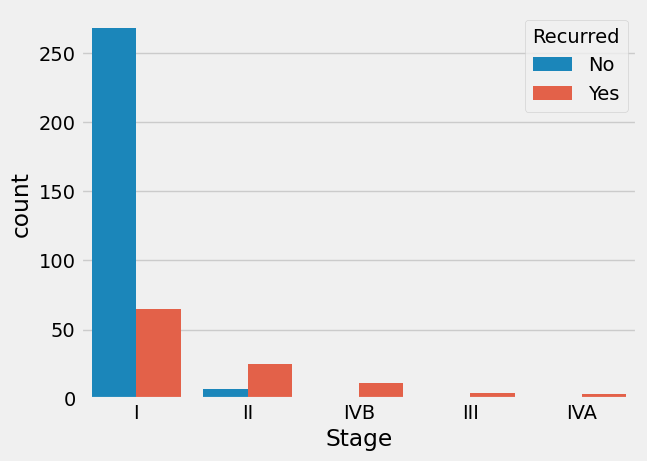

In [120]:
sns.countplot(df, x="Stage",hue="Recurred")

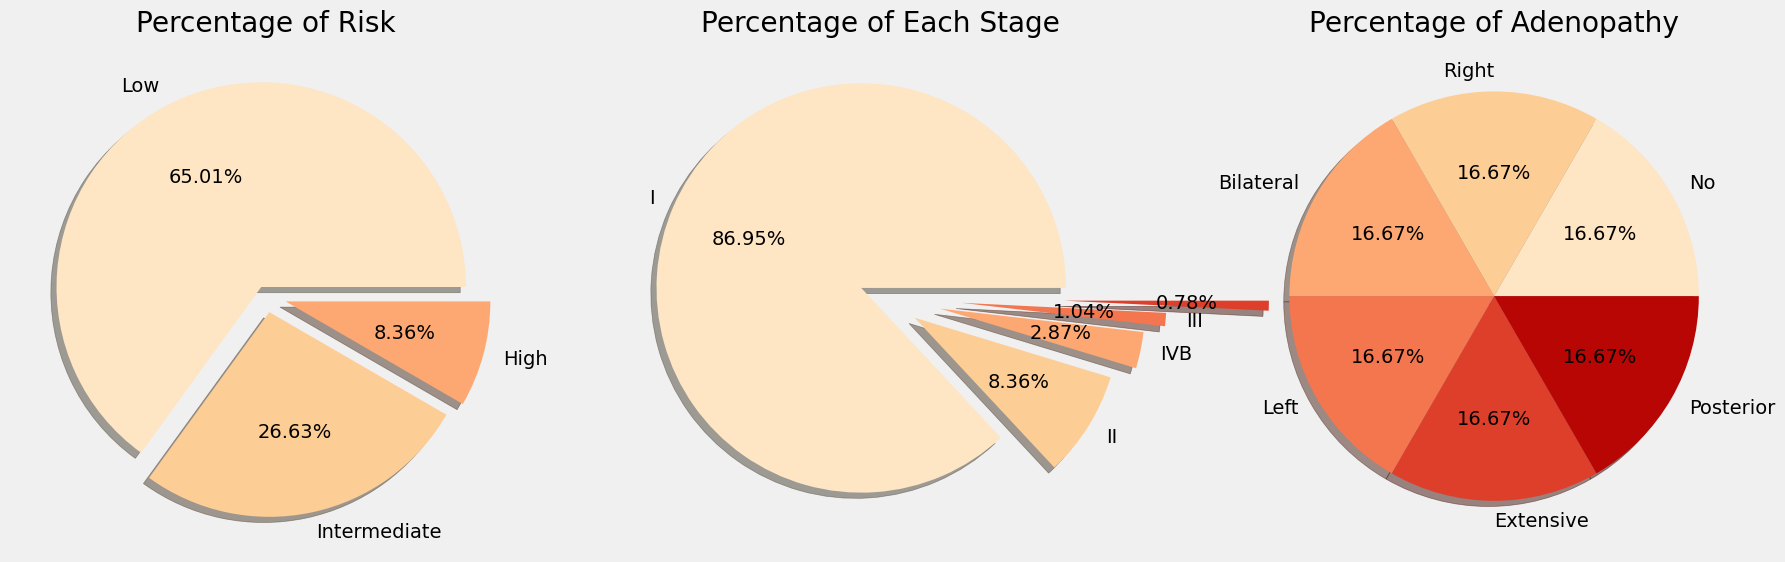

In [122]:
sns.set_palette("OrRd")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Pie chart for 'Risk'
risky = df['Risk'].value_counts()
risky.plot(kind='pie', autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=risky.index, shadow=True, ax=axes[0])
axes[0].set_title('Percentage of Risk')
axes[0].set_ylabel('')

# Pie chart for 'Stage'
Stage_of_Cancer = df['Stage'].value_counts()
Stage_of_Cancer.plot(kind='pie', autopct='%0.2f%%', labels=Stage_of_Cancer.index, explode=[0.1, 0.2, 0.3, 0.4, 0.9], shadow=True, ax=axes[1])
axes[1].set_title('Percentage of Each Stage')
axes[1].set_ylabel('')

# Pie chart for 'Adenopathy'
aden = df['Adenopathy'].value_counts()
aden.value_counts().plot(kind='pie', autopct='%0.2f%%', labels=aden.index, shadow=True, ax=axes[2])
axes[2].set_title('Percentage of Adenopathy')
axes[2].set_ylabel('')


plt.show()

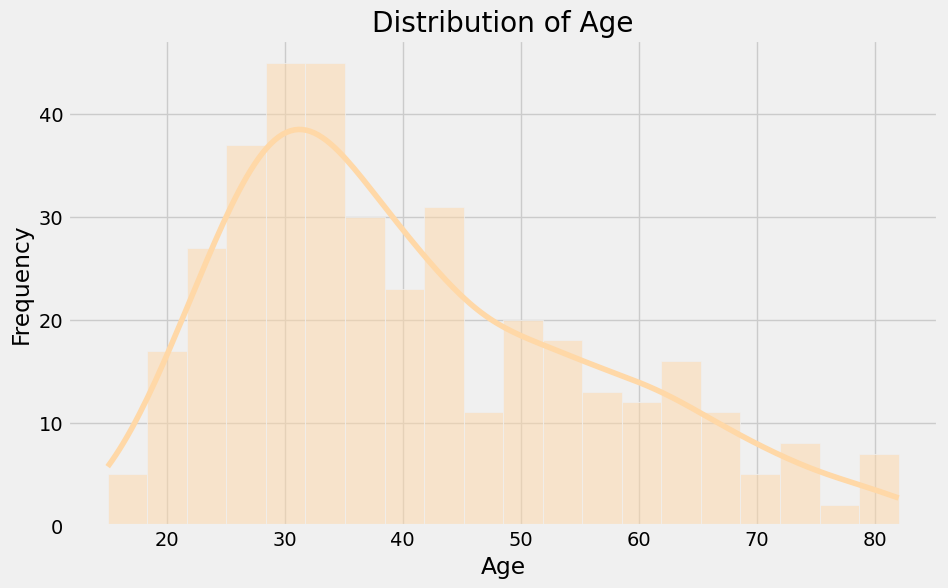

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='#ffd8a7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Text(0, 0.5, 'Count')

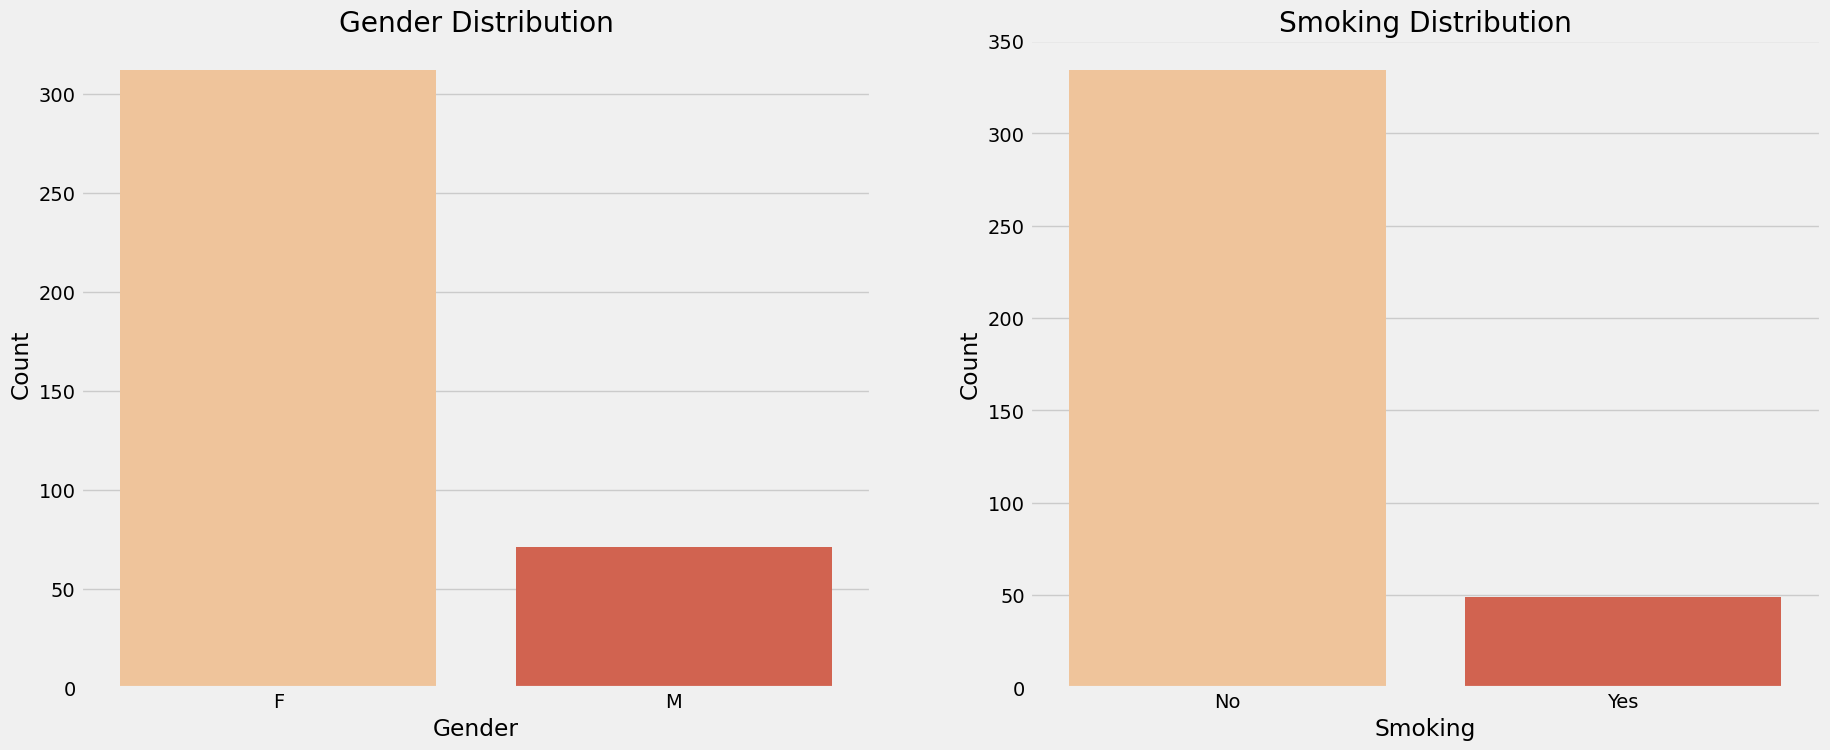

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

#Display the count of patients in each gender category.
sns.countplot(x='Gender', data=df, palette='OrRd', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(x='Smoking', data=df, palette='OrRd', ax=axes[1])
axes[1].set_title('Smoking Distribution')
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Count')

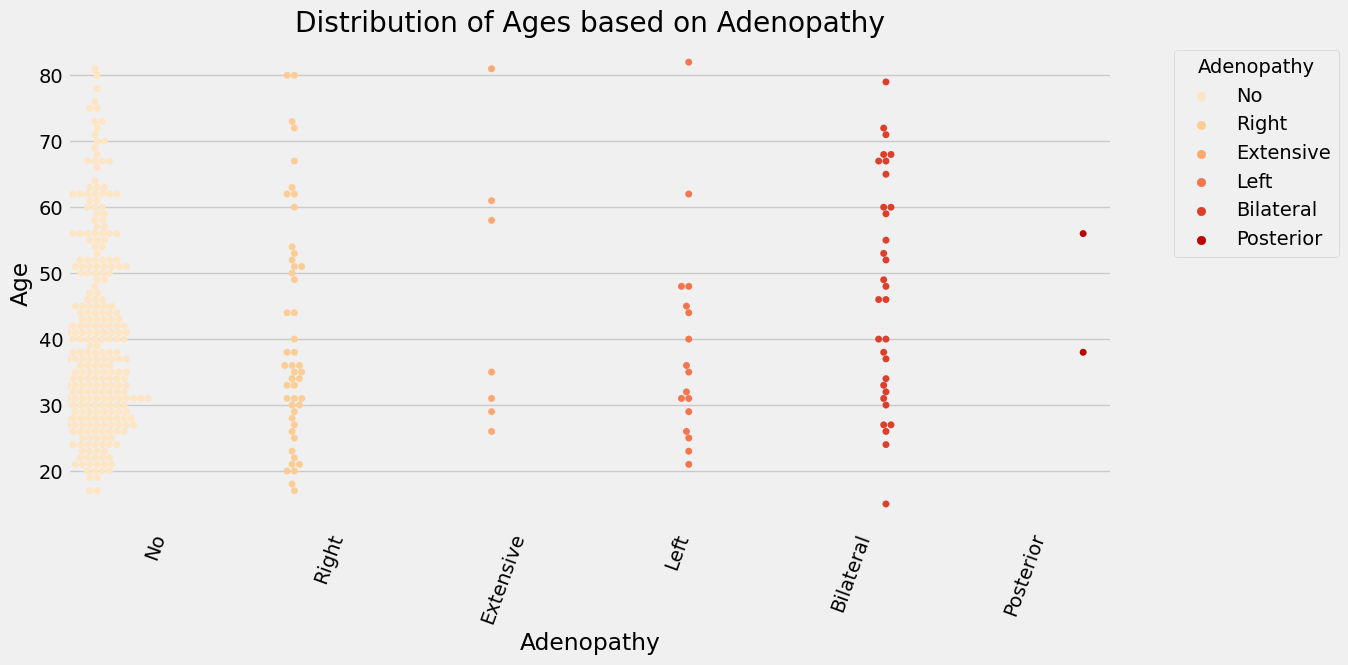

In [130]:
#the distribution of ages based on the presence and location of adenopathy using a swarm plot.
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Adenopathy', y='Age', data=df, palette='OrRd', hue='Adenopathy', dodge=True)
plt.title('Distribution of Ages based on Adenopathy')
plt.xlabel('Adenopathy')
plt.ylabel('Age')
plt.xticks(rotation=70)
plt.legend(title='Adenopathy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

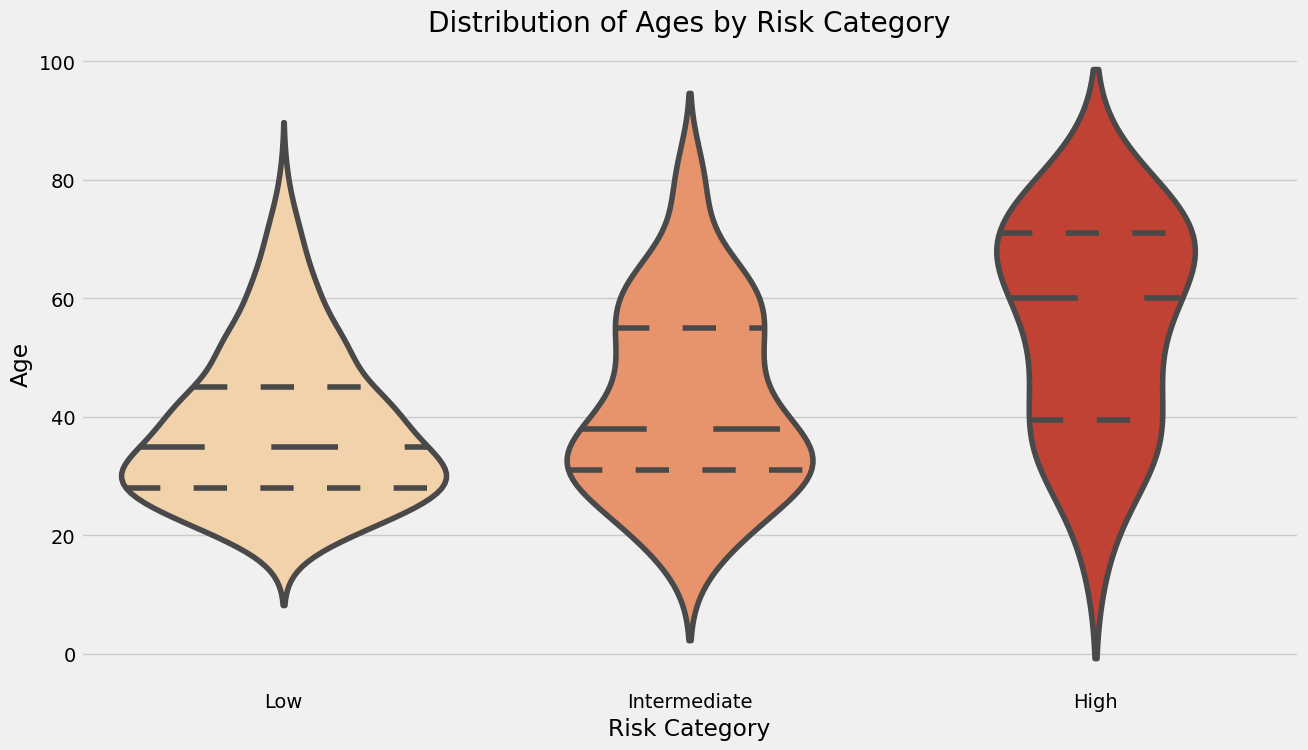

In [137]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Risk', y='Age', data=df, palette='OrRd', inner='quartile')
plt.title('Distribution of Ages by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Age')
plt.show()

# Data Pre-Processing

In [107]:
#define encoding methods for each column
encoding_methods = {
    'Gender': 'label',
    'Smoking': 'label',
    'Smoking History': 'label',
    'Radiotherapy History': 'label',
    'Thyroid Function': 'one-hot',
    'Physical Examination': 'one-hot',
    'Adenopathy': 'one-hot',
    'Pathology': 'one-hot',
    'Focality': 'label',
    'Risk': 'label',
    'Tumor': 'label',
    'Lymph Nodes': 'label',
    'Cancer Metastasis': 'label',
    'Stage': 'label',
    'Treatment Response': 'one-hot',
    'Recurred': 'label'
}

#apply encoding to each column
for column, method in encoding_methods.items():
    if method == 'label':
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
    elif method == 'one-hot':
        one_hot_encoder = OneHotEncoder(sparse = False, drop = 'first')
        encoded = one_hot_encoder.fit_transform(df[[column]])
        column_names = [f'{column}_{category}' for category in one_hot_encoder.categories_[0][1:]]
        df_encoded = pd.DataFrame(encoded, columns=column_names)
        df = pd.concat([df, df_encoded], axis = 1)
        df.drop(columns = [column], inplace = True)

In [108]:
#apply Box-Cox transformation to 'Age' column
age_boxcox, _ = stats.boxcox(df['Age'])

#apply Min-Max scaling to the transformed 'Age' column
scaler = MinMaxScaler()
age_scaled = scaler.fit_transform(age_boxcox.reshape(-1, 1)).flatten()

#replace 'Age' column with the scaled values
df['Age'] = age_scaled

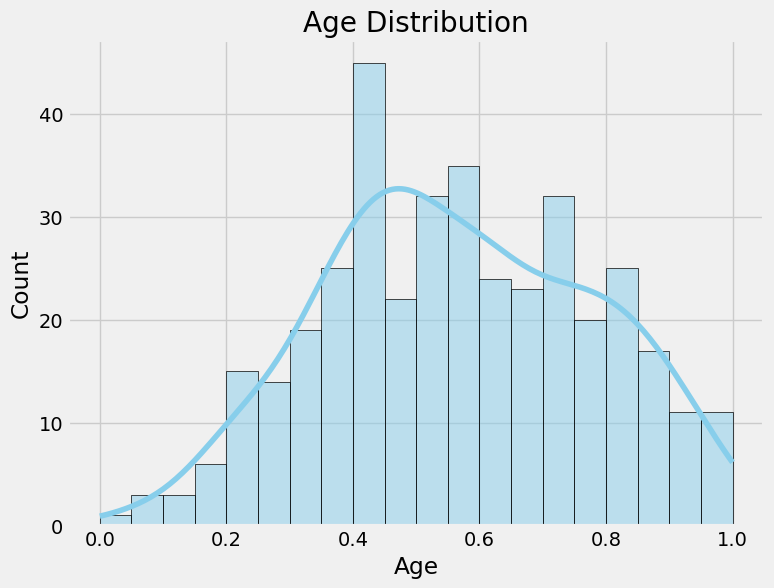

In [109]:
#Age distribution after normalizing and scaling
plt.figure(figsize = (8, 6))
sns.histplot(df['Age'], bins = 20, kde = True, color = 'skyblue', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Modelling

In [110]:
#split data into features and target
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
X = df.drop(columns=['Recurred'])
y = df['Recurred']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#instantiate classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

#fit models and generate classification reports
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\n')
    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion matrix:\n',confusion,'\n')
    print('Accuracy=',accuracy_score(y_test, y_pred) * 100)
    print('\n\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.86      1.00      0.93        19

    accuracy                           0.96        77
   macro avg       0.93      0.97      0.95        77
weighted avg       0.97      0.96      0.96        77


Confusion matrix:
 [[55  3]
 [ 0 19]] 

Accuracy= 96.1038961038961



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77


Confusion matrix:
 [[58  0]
 [ 1 18]] 

Accuracy= 98.7012987012987



K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.0